In [2]:
import sys
import os

sys.path.append('..')

from PIL import ImageFont

from comic_ocr.types import Size
from comic_ocr.utils.files import load_images, load_texts, get_path_project_dir
from comic_ocr.utils.ploting import show_images

# Generate Manga Dataset


## Prepare the data for generator 

In [3]:
generator_input_dir = get_path_project_dir('data/')

print(os.path.abspath(generator_input_dir))
print(os.listdir(generator_input_dir))

/Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data
['init_image_data.py', '.DS_Store', 'manga_line_annotated', 'drawings', 'output', 'others', 'manga_line_init', 'manga_unannotated', 'logs', 'manga_line_annotated_no_text', 'train', 'text', 'fonts']


### Prepare the data for generator > Drawings

choices_drawings 77


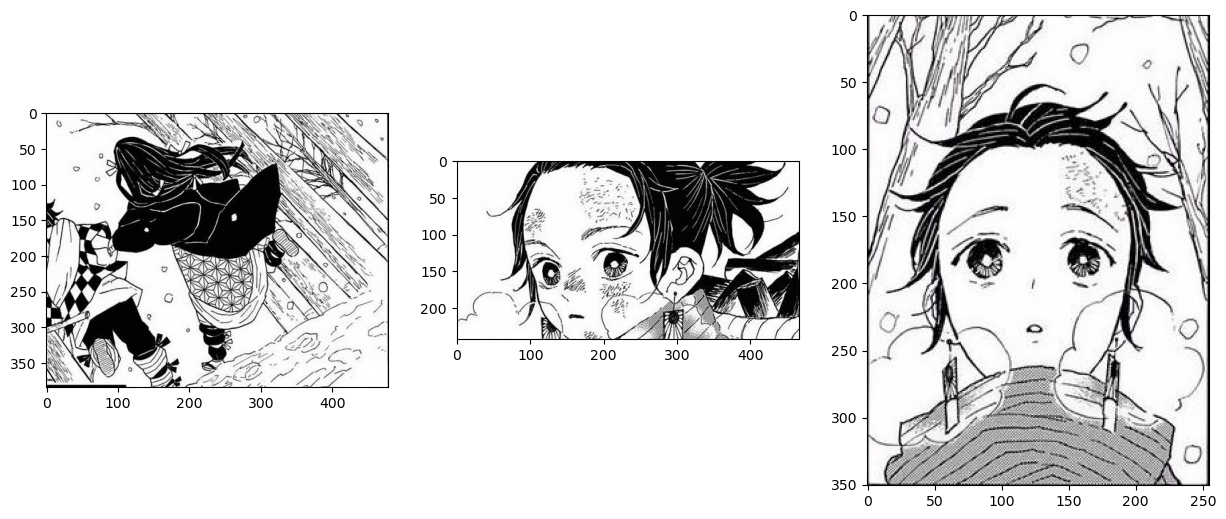

In [ ]:
choices_drawings, _ = load_images(generator_input_dir + '/drawings/*')

print('choices_drawings', len(choices_drawings))
show_images(choices_drawings[:3])

### Prepare the data for generator > Fonts

In [5]:
choices_fonts = [] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=22)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=21)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=23)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=28)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Display.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Display.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=24)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Mendalion.otf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Queensides.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/TheRifleman.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Sweet_Iced_Coffee.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/SF_Cartoonist_Hand.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/SF_Cartoonist_Hand.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Warung_Kopi.otf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Warung_Kopi.otf', size=20)]

print('choices_fonts', len(choices_fonts))

choices_fonts 30


### Prepare the data for generator > Texts (or Quotes)

In [6]:
choices_texts = load_texts(generator_input_dir + '/text/texts.txt')
choices_texts = [text for text in choices_texts if len(text) < 100]

print('choices_texts', len(choices_texts))
print(choices_texts[:3])

choices_texts 8875
['http://google.com', 'pixel.com/abc', 'Liuyuan, did anything happen?']


## Create Generator

In [7]:
from comic_ocr.dataset.generated_manga import MangaGenerator

<PIL.Image.Image image mode=RGB size=750x500 at 0x7F8A217C1B80>
[TextBubble(xy=(498, 184), text='The Rise of G.o.ds.'), TextRect(xy=(511, 62), text='Grat.i.tude received from Jiao Xiaochen, +1!', rect_padding=3, rect_fill_color=(255, 255, 255, 250), rect_outline_width=1, rect_outline_color='#000000'), TextBubble(xy=(281, 106), text='battles'), TextRect(xy=(178, 316), text='We’ve arrived at 13th High!', rect_padding=3, rect_fill_color=(255, 255, 255, 250), rect_outline_width=1, rect_outline_color='#000000')]


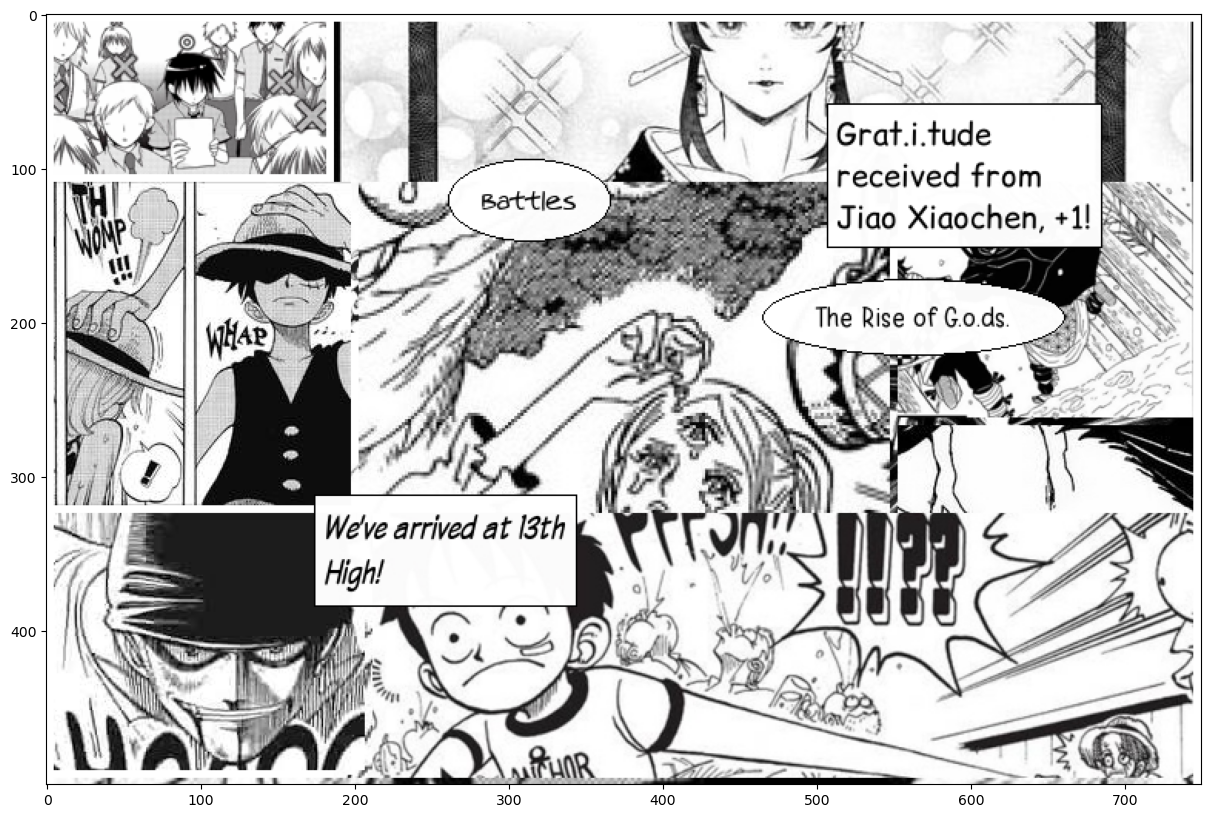

In [8]:
generator = MangaGenerator.create(
    choices_drawings=choices_drawings,
    choices_texts=choices_texts,
    choices_fonts=choices_fonts,
    choices_text_counts=[3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7],
    random_salt='ab')

image, texts = generator.generate(output_size=(750, 500), random_seed='1')
print(image)
print(texts)
show_images(image)

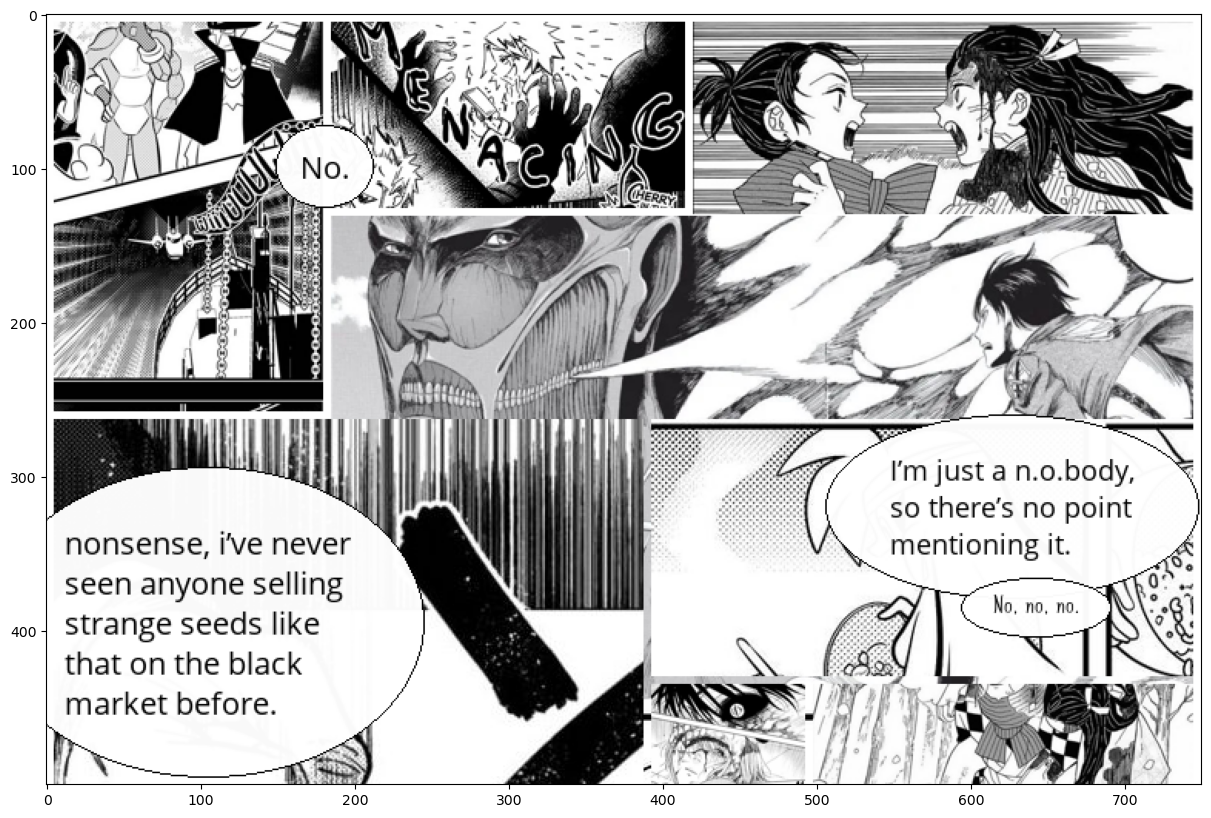

In [9]:
image, texts = generator.generate(output_size=(750, 500))
show_images(image)

## Create dataset

In [10]:
from comic_ocr.dataset.generated_manga import create_dataset

create_dataset(
    generator=generator,
    dataset_dir=get_path_project_dir('data/output/generate_manga_dataset'),
    output_size=Size.of(750, 1500),
    output_count=500,
)

KeyboardInterrupt: 

# Generate Single Line Dataset

## Prepare the data for generator 

In [13]:
choices_fonts = [] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Display.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Mendalion.otf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Queensides.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/TheRifleman.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Sweet_Iced_Coffee.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/SF_Cartoonist_Hand.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Warung_Kopi.otf', size=20)]

print('choices_fonts', len(choices_fonts))

choices_fonts 14


In [19]:
choices_texts = load_texts(generator_input_dir + '/text/texts.txt')
choices_texts = [text for text in choices_texts if len(text) < 100]

print('choices_texts', len(choices_texts))
print(choices_texts[:10])

max_length = 30
choices_texts = [c[:max_length] for c in choices_texts]
print('choices_texts', len(choices_texts))
print(choices_texts[:10])

choices_texts 8875
['http://google.com', 'pixel.com/abc', 'Liuyuan, did anything happen?', 'You don’t have to worry about such things. What I’m experiencing is not a sickness.', 'OK.', 'But what’s the point of studying in a wasteland like this...', 'It will be useful for you in the future,', 'I want to go out to hunt too.', 'Who’s going to keep watch at night if something happens to you? Me, who’s unconscious?', 'Phew!']
choices_texts 8875
['http://google.com', 'pixel.com/abc', 'Liuyuan, did anything happen?', 'You don’t have to worry about ', 'OK.', 'But what’s the point of studyi', 'It will be useful for you in t', 'I want to go out to hunt too.', 'Who’s going to keep watch at n', 'Phew!']


In [20]:
from comic_ocr.dataset.generated_single_line import SingleLineGenerator

<PIL.Image.Image image mode=RGB size=239x37 at 0x7F8A3140ABB0>
Anyway, I don’t care. You must


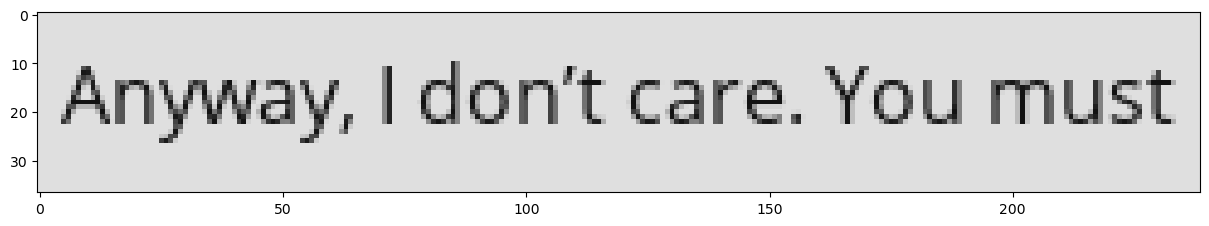

In [23]:
choices_background_colors=('#ffffff', '#dfdfdf', '#eeeeee', '#fafafa')
choices_text_colors=('#000000', '#333333', '#121212', '#444444', '#555555')

generator = SingleLineGenerator.create(
    choices_texts=choices_texts,
    choices_fonts=choices_fonts,
    choices_background_colors=choices_background_colors,
    choices_text_colors=choices_text_colors,
    random_salt='ab')

image, text = generator.generate(random_seed='1')
print(image)
print(text)
show_images(image)